In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [19]:
reviews = pd.read_csv("pew_research.csv")
print(reviews.info())
print(reviews.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10390 entries, 0 to 10389
Columns: 151 entries, QRID to UrbanVietnam
dtypes: float64(1), int64(91), object(59)
memory usage: 12.0+ MB
None
Index(['QRID', 'weight', 'SurveyPublic', 'DEMONYM', 'Q1', 'Q2a', 'Q2b', 'Q2c',
       'Q2d', 'Q3',
       ...
       'QZIPHKG', 'QZIPHKG2', 'QZIPJPN2', 'QZIPKOR', 'QZIPTWN',
       'VietnamRegion', 'GenderRec', 'Language', 'ISCED', 'UrbanVietnam'],
      dtype='object', length=151)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17844\212260270.py:1: DtypeWarning: Columns (12,13,14,15,101,104,110,111,112,113,114) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("pew_research.csv")


In [5]:
reviews.head()
print(reviews.head())

      QRID    weight  SurveyPublic  DEMONYM  Q1  Q2a  Q2b  Q2c  Q2d  Q3  ...  \
0  1300002  0.469825             1        1   1    3    3    3    3   2  ...   
1  1300003  0.546789             1        1   3    1    2    1    3   2  ...   
2  1300049  0.703324             1        1   2    1    3    1    3   2  ...   
3  1300057  0.844956             1        1   1    3    3    3    3   2  ...   
4  1300065  0.552330             1        1   3    3    3    3    3   2  ...   

   QZIPHKG  QZIPHKG2 QZIPJPN2 QZIPKOR QZIPTWN VietnamRegion  GenderRec  \
0       17         3                                                 2   
1       17         3                                                 2   
2       10         3                                                 1   
3        3         1                                                 1   
4        3         1                                                 2   

   Language  ISCED UrbanVietnam  
0         1      5               
1     

In [6]:
print(reviews.columns)

Index(['QRID', 'weight', 'SurveyPublic', 'DEMONYM', 'Q1', 'Q2a', 'Q2b', 'Q2c',
       'Q2d', 'Q3',
       ...
       'QZIPHKG', 'QZIPHKG2', 'QZIPJPN2', 'QZIPKOR', 'QZIPTWN',
       'VietnamRegion', 'GenderRec', 'Language', 'ISCED', 'UrbanVietnam'],
      dtype='object', length=151)


In [17]:
reviews.loc[:, ['Q24a', 'Q24b', 'Q24c', 'Q24d']]

,Q24a,Q24b,Q24c,Q24d
0,2,2,2,2
1,2,2,2,2
2,1,2,2,2
3,2,2,2,2
4,1,2,1,2
...,...,...,...,...
10385,1,2,2,1
10386,1,2,1,1
10387,2,2,2,2
10388,98,98,1,2


In [24]:
q24_columns = ['Q24a', 'Q24b', 'Q24c', 'Q24d']
q24_data = reviews[q24_columns]
print(q24_data.head())

   Q24a  Q24b  Q24c  Q24d
0     2     2     2     2
1     2     2     2     2
2     1     2     2     2
3     2     2     2     2
4     1     2     1     2


In [32]:
q24_data.replace([98, 99], None, inplace=True)
q24_data = q24_data.apply(pd.to_numeric)
print(q24_data)

       Q24a  Q24b  Q24c  Q24d
0       2.0   2.0   2.0   2.0
1       2.0   2.0   2.0   2.0
2       1.0   2.0   2.0   2.0
3       2.0   2.0   2.0   2.0
4       1.0   2.0   1.0   2.0
...     ...   ...   ...   ...
10385   1.0   2.0   2.0   1.0
10386   1.0   2.0   1.0   1.0
10387   2.0   2.0   2.0   2.0
10388   NaN   NaN   1.0   2.0
10389   2.0   2.0   2.0   2.0

[10390 rows x 4 columns]


In [35]:
for col in q24_columns:
    print(f"Results for {col}:")
    print(q24_data[col].value_counts()) # yes is 1 and No is 2

Results for Q24a:
Q24a
2.0    5858
1.0    4235
Name: count, dtype: int64
Results for Q24b:
Q24b
2.0    9282
1.0     862
Name: count, dtype: int64
Results for Q24c:
Q24c
2.0    7471
1.0    2854
Name: count, dtype: int64
Results for Q24d:
Q24d
2.0    8567
1.0    1617
Name: count, dtype: int64


In [36]:
import matplotlib.pyplot as plt

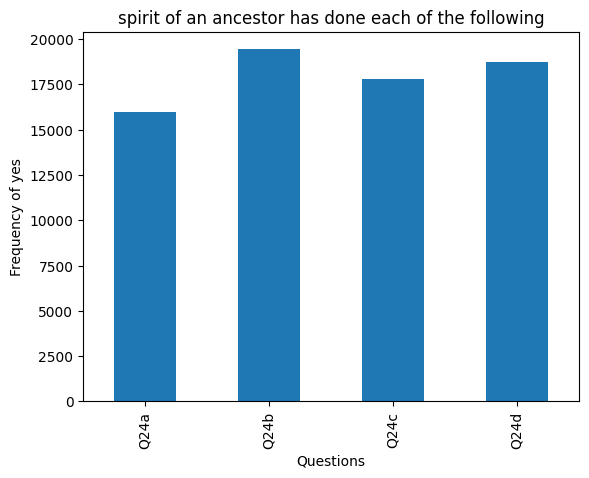

In [ ]:
q24_data.sum().plot(kind='bar', title='spirit of an ancestor has done each of the following')
plt.xlabel('Questions')
plt.ylabel('Frequency of "yes"')
plt.show()

                Q24a       Q24b      Q24c       Q24d
GenderRec                                           
1           4.373221   4.078439  2.308099   3.455126
2           4.218641   4.255800  2.331965   4.014576
999        14.702703  12.297297  4.405405  12.216216


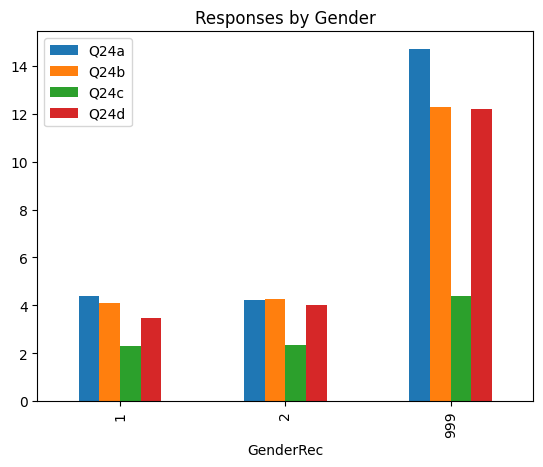

In [47]:
grouped = reviews.groupby('GenderRec')[q24_columns].mean()
print(grouped)
grouped.plot(kind='bar', title='Responses by Gender')
plt.show()

In [49]:
most_common = q24_data.sum(axis=0).idxmax()  # Find the question with the most "Yes" answers
print(f"The question with the most 'Yes' responses is: {most_common}")

The question with the most 'Yes' responses is: Q24b


In [56]:
q24_labels = {
    'Q24a': 'Helped',
    'Q24b': 'Punished',
    'Q24c': 'visit in dream',
    'Q24d': 'Came in any other form'
    }

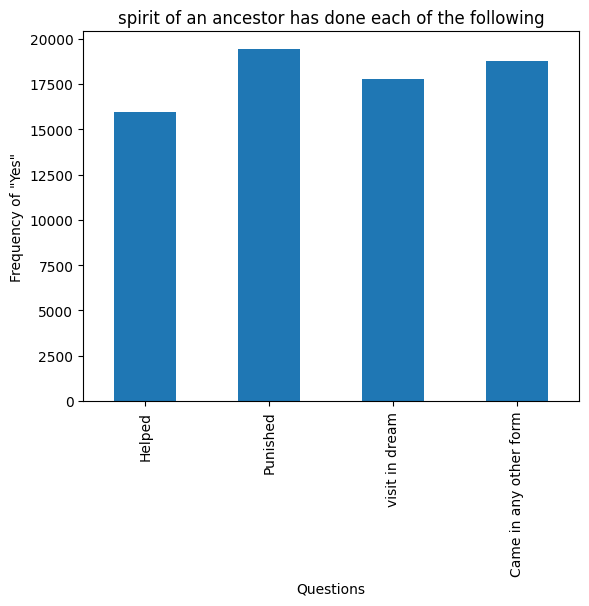

In [57]:
q24_data.sum().rename(index=q24_labels).plot(kind='bar', title='spirit of an ancestor has done each of the following')
plt.xlabel('Questions')
plt.ylabel('Frequency of "Yes"')
plt.show()